# **Table of Contents**
* [Dataset 1](#section_a)
    * [OLS](#section_b)
    * [Best Fit Line](#section_c)
- [Dataset 2](#section_d)
    * [OLS](#section_e)
    * [Drop + OLS](#section_f)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import warnings
warnings.simplefilter ('ignore')

<a id='section_a'></a>
# **Dataset 1: Airline Cost**

In [2]:
df  =  pd.read_csv ('datasets/airline cost.csv')

df.sample(5)

,psg,cost
8,86,5110
24,69,4500
18,67,4040
46,92,5410
27,76,4530


* psg  -- num of passenger -- X 
* cost -- cost to airline -- Y (target col)

In [3]:
x  =  df ['psg']
y  =  df ['cost']

<a id='section_b'></a>
# **OLS**

In [4]:
import statsmodels.api  as  sm

xc    =  sm.add_constant(x)

model =  sm.OLS(y,xc).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     302.2
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           4.23e-22
Time:                        21:41:15   Log-Likelihood:                -323.87
No. Observations:                  49   AIC:                             651.7
Df Residuals:                      47   BIC:                             655.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1612.9763    185.831      8.680      0.000    1239.133    1986.820
psg           39.8941      2.295     17.383      0.000      35.277      44.511
==============================================================================
Omnibus:                        3.612   Durbin-Watson:                   2.624
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                2.700
Skew:                           0.556   Prob(JB):                        0.259
Kurtosis:                       3.296   Cond. No.                         574.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>  Equation :
        
        * Cost =  39*psg +  1612

> Comments :

        * R-square =  0.86
        * Means , 86 % variation in target col , is explained by features
        * Good performance of model

<a id='section_c'></a>
# **Best Fit Line**

In [5]:
y_pred  =  model.predict(xc)

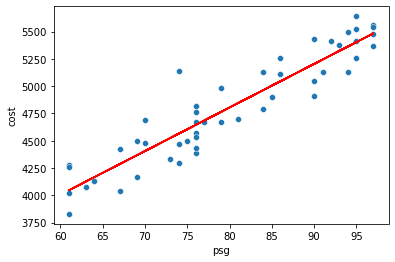

In [6]:
sns.scatterplot (x,  y)

plt.plot        (x,  y_pred, 'r')

plt.show()

<a id='section_d'></a>
# **Dataset 2 : Virginia Semiconductor**

In [7]:
df  =  pd.read_csv ('datasets/virginia semiconductors.csv')

df.sample(4)

,Size_of_Purchase,Company_Size,%Imports,Distance,Central_Purchaser
7,235.0,84.7,5,89,1
0,27.9,25.6,41,18,0
11,101.4,84.0,31,19,0
5,173.5,98.4,8,114,1


**Target Col -- Size_of_Purchase**

<a id='section_e'></a>
# **OLS**

In [8]:
x  =  df.drop ( 'Size_of_Purchase' , axis=1)
y  =  df ['Size_of_Purchase']

In [9]:
xc     =  sm.add_constant(x)

model  =  sm.OLS(y,xc).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Size_of_Purchase   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     55.00
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.28e-07
Time:                        21:41:15   Log-Likelihood:                -82.436
No. Observations:                  17   AIC:                             174.9
Df Residuals:                      12   BIC:                             179.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.6686     30.107     -0.122      0.905     -69.266      61.929
Company_Size          1.2687      0.200      6.355      0.000       0.834       1.704
%Imports              0.0508      0.865      0.059      0.954      -1.834       1.936
Distance             -0.2204      0.256     -0.860      0.407      -0.779       0.338
Central_Purchaser   127.3502     23.880      5.333      0.000      75.321     179.380
==============================================================================
Omnibus:                        2.223   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.588
Skew:                          -0.727   Prob(JB):                        0.452
Kurtosis:                       2.640   Cond. No.                         542.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='section_f'></a>
# **Drop + OLS**

In [10]:
x  =  df.drop  (  ['%Imports','Distance'] , axis=1 )                  # insig cols

In [11]:
xc    =  sm.add_constant(x)

model =  sm.OLS(y,xc).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Size_of_Purchase   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.657e+30
Date:                Sun, 27 Jun 2021   Prob (F-statistic):          7.30e-194
Time:                        21:41:15   Log-Likelihood:                 475.39
No. Observations:                  17   AIC:                            -942.8
Df Residuals:                      13   BIC:                            -939.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.155e-14    8.8e-14      0.131      0.898   -1.79e-13    2.02e-13
Size_of_Purchase      1.0000   1.48e-15   6.77e+14      0.000       1.000       1.000
Company_Size      -1.443e-15   1.94e-15     -0.743      0.471   -5.64e-15    2.75e-15
Central_Purchaser -1.421e-14   2.22e-13     -0.064      0.950   -4.93e-13    4.64e-13
==============================================================================
Omnibus:                        3.750   Durbin-Watson:                   0.702
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.024
Skew:                           0.831   Prob(JB):                        0.364
Kurtosis:                       3.305   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Comments
    
        * Size_of_Purchase   =   -8.53   +  ( 1.19 * Company_Size )  +  ( 126.9 * Central_Purchaser )
        
> Obs 

        * R2 = 0.942
        * So, 94.2% variation in Y is accounted by X1 & X2

> Sig of Overall Model

        * F-test
        * H0 : Model not significant
        * H1 : Model is significant

In [12]:
model. f_pvalue

7.30196338026712e-194

* p < alpha
* Reject Null
* Model is significant

> Confidence Interval

        * To know Upper & Lower CL of the coeffs 

In [13]:
model.conf_int (alpha=0.05)                      # 95 % CI

,0,1
const,-1.785069e-13,2.015995e-13
Size_of_Purchase,1.000000e+00,1.000000e+00
Company_Size,-5.638837e-15,2.752258e-15
Central_Purchaser,-4.928725e-13,4.644507e-13
